<a href="https://colab.research.google.com/github/yejianfeng2014/keras/blob/master/keras_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
print(tf.__version__)

import keras

print(keras.__version__)

1.12.0
2.2.4


Using TensorFlow backend.


In [0]:
import keras
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop


In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [46]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


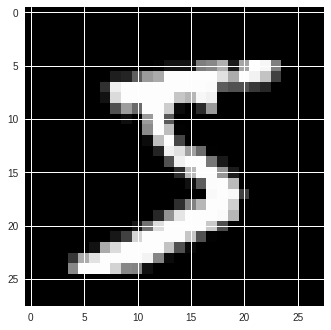

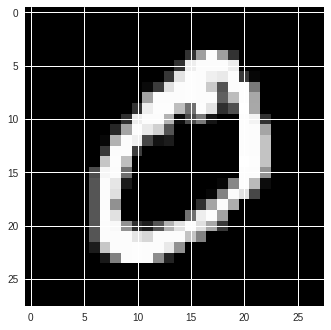

In [47]:
import matplotlib.pyplot as plt
im = plt.imshow(x_train[0],cmap='gray')
plt.show()
im2 = plt.imshow(x_train[1],cmap='gray')
plt.show()

In [48]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
# x_train = x_train.astype('float32')
# x_train = x_train.astype('float32')
print(x_train.shape)

(60000, 784)


归一化，将图像的像素归到0~1

In [0]:
x_train = x_train/255
x_test = x_test/255

In [50]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

print(y_train[0:10])#查看转换完毕的标签

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [0]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [54]:
print(y_train[0:10])#查看转换完毕的标签

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [0]:
model = Sequential()
model.add(Dense(512,activation = 'relu',input_shape = (784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation = 'relu'))

model.add(Dropout(0.2))
model.add(Dense(10,activation = 'softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [58]:
model.fit(x_train,y_train,batch_size=64,epochs=2,verbose=1,
         validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 8s 138us/step - loss: 0.2255 - acc: 0.9313 - val_loss: 0.1246 - val_acc: 0.9632
Epoch 2/2
60000/60000 [==============================] - 6s 102us/step - loss: 0.1071 - acc: 0.9694 - val_loss: 0.0957 - val_acc: 0.9748


In [59]:
score = model.evaluate(x_test,y_test,verbose=1)
print('Test loss:',score[0])
print('Test accuracy',score[1])

10000/10000 [==============================] - 1s 54us/step
Test loss: 0.09570447974821145
Test accuracy 0.9748
